In [2]:
from Tools import *
from matplotlib.lines import Line2D

In [11]:
Detailed_gas = ct.Solution("detailed.yaml")
Reduced_gas = ct.Solution("reduced.yaml")
# Optim_1 =ct.Solution("/work/kotlarcm/WORK/V2/Orion/NO_START_WITH_REDUCED_Start_mpi_pop10_gen100_PyOptMECH_Case1/mech/Mech_gen_1.yaml")
# Optim_100=ct.Solution("/work/kotlarcm/WORK/V2/Orion/NO_START_WITH_REDUCED_Start_mpi_pop10_gen100_PyOptMECH_Case1/Reduced_mpi_pop_PyOptMECH.yaml")
Optim_1 = ct.Solution("STEC_A.yaml")
Optim_100 = ct.Solution("STEC_B.yaml")
pressure = np.linspace(1,1,1).tolist()
temperature = np.linspace(1500,1500,1).tolist()
phi = np.linspace(1,1.0,1).tolist()
mixture =np.linspace(0.85,0.85,1).tolist()


Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]

param = ["shift","interpol","scaler"]

fuel1 = "NH3"
fuel2 ="H2"
oxidizer = 'O2:0.21, N2:0.79, AR : 0.01' 
tmax = 1
dt= 1e-6
case = generate_test_cases_bifuel(temperature,pressure,phi,mixture)
idx_target_det = spcs_name_idx(Detailed_gas,Targets)
idx_target_red = spcs_name_idx(Reduced_gas,Targets)
idx_target_optim1 = spcs_name_idx(Optim_1,Targets)
idx_target_optim100 = spcs_name_idx(Optim_100,Targets)

idx_non_target_det = spcs_name_idx(Detailed_gas,Non_Target)
idx_non_target_red = spcs_name_idx(Reduced_gas,Non_Target)
idx_non_target_optim1 = spcs_name_idx(Optim_1,Non_Target)
idx_non_target_optim100 = spcs_name_idx(Optim_100,Non_Target)



/tmp/ipykernel_405984/1030872073.py:1: UserWarning: NasaPoly2::validate: 
For species OHV, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  Detailed_gas = ct.Solution("detailed.yaml")


In [4]:
print(idx_target_det)
print(idx_target_red)
print(idx_target_optim1)
print(idx_target_optim100)

[2, 12, 4, 7, 11, 6, 26, 31, 1]
[2, 10, 4, 7, 9, 6, 17, 18, 1]
[2, 10, 4, 7, 9, 6, 17, 18, 1]
[2, 10, 4, 7, 9, 6, 17, 18, 1]


In [18]:
Time_det , Temp_det, Y_Target_det,Y_Non_Target_det = Sim0D_launch(Detailed_gas,Detailed_gas,fuel1,fuel2,oxidizer,case,idx_target_det,idx_non_target_det,dt,tmax)
Test = Y_Target_det
Y_Target_det = np.log(Y_Target_det)
Y_Non_Target_det = np.log(Y_Non_Target_det)
Time_det , Temp_det, Y_Target_det,Y_Non_Target_det, Scaler_Target_det,Scaler_Non_Target_det,AI_delay_det,Temp_scaler = Change_detailed(Time_det,Temp_det,Y_Target_det,Y_Non_Target_det,case,Targets,Non_Target,param) # transform 

(101325.0, 1500.0, 1.0, 0.85)


/tmp/ipykernel_405984/2286680008.py:3: RuntimeWarning: divide by zero encountered in log
  Y_Target_det = np.log(Y_Target_det)
/tmp/ipykernel_405984/2286680008.py:4: RuntimeWarning: divide by zero encountered in log
  Y_Non_Target_det = np.log(Y_Non_Target_det)
/work/kotlarcm/WORK/V2/myenvmpi/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


[array([[2.65215939e-03, 1.26962922e-01, 1.99951901e-01, ...,
        0.00000000e+00, 0.00000000e+00, 6.58545253e-01],
       [2.65215748e-03, 1.26962717e-01, 1.99951494e-01, ...,
        5.44043431e-17, 2.09818998e-14, 6.58545253e-01],
       [2.65215467e-03, 1.26962495e-01, 1.99951070e-01, ...,
        7.08913788e-16, 5.43457159e-14, 6.58545253e-01],
       ...,
       [3.00665107e-03, 3.42617123e-08, 1.38058979e-02, ...,
        1.90236607e-06, 4.71133837e-07, 7.59311614e-01],
       [3.00665107e-03, 3.42617123e-08, 1.38058979e-02, ...,
        1.90236607e-06, 4.71133837e-07, 7.59311614e-01],
       [3.00665107e-03, 3.42617123e-08, 1.38058979e-02, ...,
        1.90236607e-06, 4.71133837e-07, 7.59311614e-01]])]
[[[ -5.93238111  -2.06386019  -1.60967844 ...         -inf         -inf
    -0.41772204]
  [ -5.93238183  -2.0638618   -1.60968047 ... -37.45008769 -31.49511624
    -0.41772204]
  [ -5.93238289  -2.06386355  -1.60968259 ... -34.88279775 -30.54341061
    -0.41772204]
  ...
  [ 

/tmp/ipykernel_405984/3490860659.py:2: RuntimeWarning: divide by zero encountered in log
  print(np.log(Test))


In [6]:
print(AI_delay_det)

[0.02730000000000665, 0.006051000000000479, 0.0020329999999999454, 0.0008940000000000152, 0.00047900000000000514, 0.00029400000000000064, 0.00019699999999999956, 0.00013899999999999972, 0.00010099999999999981, 7.499999999999989e-05, 5.599999999999994e-05]


In [13]:
Time_red , Temp_red, Y_Target_red,Y_Non_Target_red = Sim0D_launch(Reduced_gas,Reduced_gas,fuel1,fuel2,oxidizer,case,idx_target_red,idx_non_target_red,dt,tmax) 
Y_Target_red = np.log(Y_Target_red)
Y_Non_Target_red = np.log(Y_Non_Target_red)
Time_red , Temp_red, Y_Target_red,Y_Non_Target_red,AI_delay_red =Change_Reduced(Time_red,Temp_red,Y_Target_red,Y_Non_Target_red,case,Targets,Non_Target,Time_det,Scaler_Target_det,Scaler_Non_Target_det,Temp_scaler,param)

(101325.0, 1500.0, 1.0, 0.85)


/tmp/ipykernel_405984/2380981973.py:2: RuntimeWarning: divide by zero encountered in log
  Y_Target_red = np.log(Y_Target_red)
/tmp/ipykernel_405984/2380981973.py:3: RuntimeWarning: divide by zero encountered in log
  Y_Non_Target_red = np.log(Y_Non_Target_red)


In [8]:
print(AI_delay_red)

[0.014088999999996101, 0.003491000000000139, 0.001477999999999975, 0.0007950000000000128, 0.00048800000000000536, 0.0003250000000000014, 0.00022899999999999947, 0.00016699999999999964, 0.00012499999999999976, 9.499999999999983e-05, 7.299999999999989e-05]


In [9]:
Time_red_optim1, Temp_red_optim1, Y_Target_red_optim1,Y_Non_Target_red_optim1 = Sim0D_launch(Optim_1,Optim_1,fuel1,fuel2,oxidizer,case,idx_target_optim1,idx_non_target_optim1,dt,tmax) 
        #transform (Shift, Interp, Scal)
Time_red_optim1 , Temp_red_optim1, Y_Target_red_optim1,Y_Non_Target_red_optim1,AI_delay_red_optim1 =Change_Reduced(Time_red_optim1,Temp_red_optim1,Y_Target_red_optim1,Y_Non_Target_red_optim1,case,Targets,Non_Target,Time_det,Scaler_Target_det,Scaler_Non_Target_det,Temp_scaler,param)

In [10]:
print(AI_delay_red_optim1)

[0.018966999999998315, 0.004411000000000261, 0.0017209999999999546, 0.0008700000000000146, 0.0005090000000000059, 0.00032700000000000144, 0.00022299999999999948, 0.00015799999999999967, 0.00011499999999999977, 8.499999999999986e-05, 6.399999999999992e-05]


In [11]:
Time_red_optim100, Temp_red_optim100, Y_Target_red_optim100,Y_Non_Target_red_optim100 = Sim0D_launch(Optim_100,Optim_100,fuel1,fuel2,oxidizer,case,idx_target_optim100,idx_non_target_optim100,dt,tmax) 
        #transform (Shift, Interp, Scal)
Time_red_optim100 , Temp_red_optim100, Y_Target_red_optim100,Y_Non_Target_red_optim100,AI_delay_red_optim100 =Change_Reduced(Time_red_optim100,Temp_red_optim100,Y_Target_red_optim100,Y_Non_Target_red_optim100,case,Targets,Non_Target,Time_det,Scaler_Target_det,Scaler_Non_Target_det,Temp_scaler,param)

In [12]:
print(AI_delay_red_optim100)

[0.02993200000000928, 0.005503000000000406, 0.0017839999999999493, 0.0008080000000000131, 0.00044700000000000436, 0.0002790000000000003, 0.0001859999999999996, 0.00012999999999999974, 9.299999999999983e-05, 6.79999999999999e-05, 4.899999999999996e-05]


In [16]:

def fit_pyoptmec(Y_t_red,Y_t_det,time_det,Y_nt_red,Y_nt_det,temp_red,temp_det,ai_det,ai_red,case) : 
    F1_m =[]
    F2_m =[]
    F3_m =[] 
    F4_m = []
    for c in range(len(case)) : 
        # Equation F1_m
        top1 = np.trapezoid(np.abs(np.array(Y_t_red[c]) - np.array(Y_t_det[c])), np.array(time_det[c]))
        bot1 = np.trapezoid(np.abs(np.array(Y_t_det[c])), np.array(time_det[c]))
        F1_m.append( (top1/bot1)**2)

        # Equation F2_m
        top2 = [(np.max(Y_nt_red[c],axis=1)[j] - np.max(Y_nt_det[c],axis=1)[j]) for j in range(len(np.max(Y_nt_det[c],axis=1))) ]
        bot2 = [np.max(Y_nt_det[c],axis=1)[j] for j in range(len(np.max(Y_nt_det[c],axis=1))) ]
    
        F2_m.append((np.array(top2)/np.array(bot2))**2)

        # Equation F3_m
        top3 = np.trapezoid(np.abs(temp_red[c] - temp_det[c]), time_det[c])
        bot3 = np.trapezoid(np.abs(temp_det[c]), time_det[c])
        F3_m .append(( top3/ bot3)**2)

        # Equation F4_m
        top4 = (ai_red[c] - ai_det[c])
        bot4= ai_det[c]
        F4_m.append((top4/bot4)**2)
        
    weight = [1,1,1,1]
    # print(f"F1 = {F1_m}")
    # print(f"F2 = {F2_m}")
    
    _err = (
                weight[0] * np.sum(F1_m)
                + weight[1] * np.sum(F2_m)
                + weight[2] * F3_m
                + weight[3] * F4_m
            )
    # print(f"Err : {_err}")

    err = np.sqrt(np.sum(_err))
    print(np.sqrt(np.sum(_err)))
    return err,F1_m,F2_m,F3_m,F4_m

In [17]:
Err,F1,F2,F3,F4 = fit_pyoptmec(Y_Target_red,Y_Target_det,Time_det,Y_Non_Target_red,Y_Non_Target_det,Temp_red,Temp_det,AI_delay_det,AI_delay_red,case)
Err_1 ,F1_1,F2_1,F3_1,F4_1 = fit_pyoptmec(Y_Target_red_optim1,Y_Target_det,Time_det,Y_Non_Target_red_optim1,Y_Non_Target_det,Temp_red_optim1,Temp_det,AI_delay_det,AI_delay_red_optim1,case)

Err_100 ,F1_100,F2_100,F3_100,F4_100 = fit_pyoptmec(Y_Target_red_optim100,Y_Target_det,Time_det,Y_Non_Target_red_optim100,Y_Non_Target_det,Temp_red_optim100,Temp_det,AI_delay_det,AI_delay_red_optim100,case)


nan


Text(0.5, 1.0, 'F4')

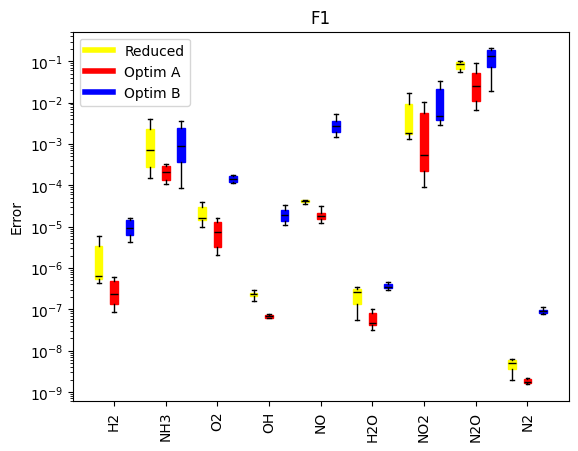

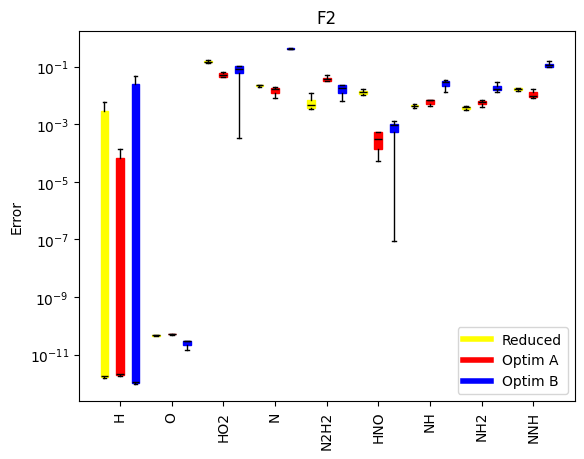

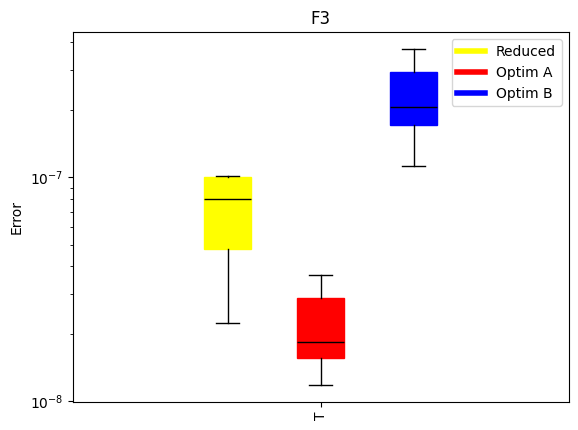

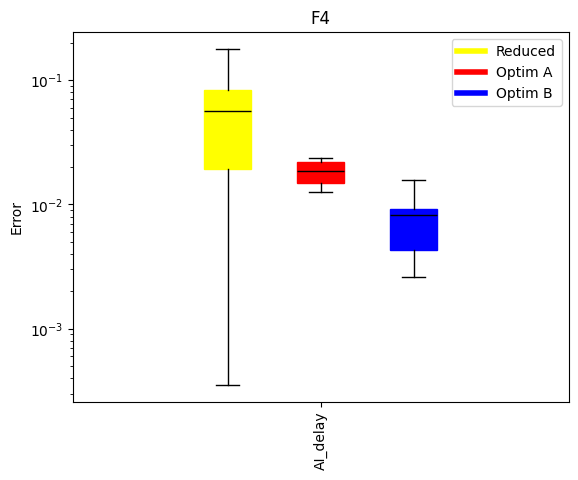

In [18]:
#F1
plt.figure()
positions = range(1, len(Targets) + 1)
for spec in range(len(Targets)) : 
    plt.boxplot((np.array(F1)[:,spec]), positions=[spec + 1],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='yellow', color='yellow'),
                medianprops=dict(color='black'))
    plt.boxplot(np.array(F1_1)[:,spec], positions=[spec + 1 + 0.3],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor="red", color="red"),
                medianprops=dict(color='black'))
    plt.boxplot(np.array(F1_100)[:,spec], positions=[spec + 1 + 0.6],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor="blue", color="blue"),
                medianprops=dict(color='black'))

x = [x+0.3 for x in positions]
plt.xticks(x, Targets, rotation=90)  
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
plt.yscale('log')
plt.ylabel("Error")
plt.title("F1")


#F2
plt.figure()
positions = range(1, len(Non_Target) + 1)

for spec in range(len(Non_Target)) : 
    plt.boxplot((np.array(F2)[:,spec]), positions=[spec + 1],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='yellow', color='yellow'),
                medianprops=dict(color='black'))
    plt.boxplot(np.array(F2_1)[:,spec], positions=[spec + 1 + 0.3],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor="red", color="red"),
                medianprops=dict(color='black'))
    plt.boxplot(np.array(F2_100)[:,spec], positions=[spec + 1 + 0.6],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor="blue", color="blue"),
                medianprops=dict(color='black'))
x = [x+0.3 for x in positions]
plt.xticks(x, Non_Target, rotation=90)  
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
plt.yscale('log')
plt.ylabel("Error")
plt.title("F2")
    
    
plt.figure()
# F3
positions = range(1, len(["T"]) + 1)
plt.boxplot(F3, positions=[1-0.3],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='yellow', color='yellow'),
                medianprops=dict(color='black'))
plt.boxplot(F3_1, positions=[1],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='red', color='red'),
                medianprops=dict(color='black'))
plt.boxplot(F3_100, positions=[1+0.3],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='blue', color='blue'),
                medianprops=dict(color='black'))
plt.xticks(positions, ["T"], rotation=90)  
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
plt.yscale('log')
plt.ylabel("Error")
plt.title("F3")

# F4
plt.figure()
positions = range(1, len(["AI_delay"]) + 1)
plt.boxplot(F4, positions=[1-0.3],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='yellow', color='yellow'),
                medianprops=dict(color='black'))
plt.boxplot(F4_1, positions=[1],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='red', color='red'),
                medianprops=dict(color='black'))
plt.boxplot(F4_100, positions=[1+0.3],showfliers=False, patch_artist=True, 
                boxprops=dict(facecolor='blue', color='blue'),
                medianprops=dict(color='black'))
plt.xticks(positions, ["AI_delay"], rotation=90)  
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
plt.yscale('log')
plt.ylabel("Error")
plt.title("F4")
    


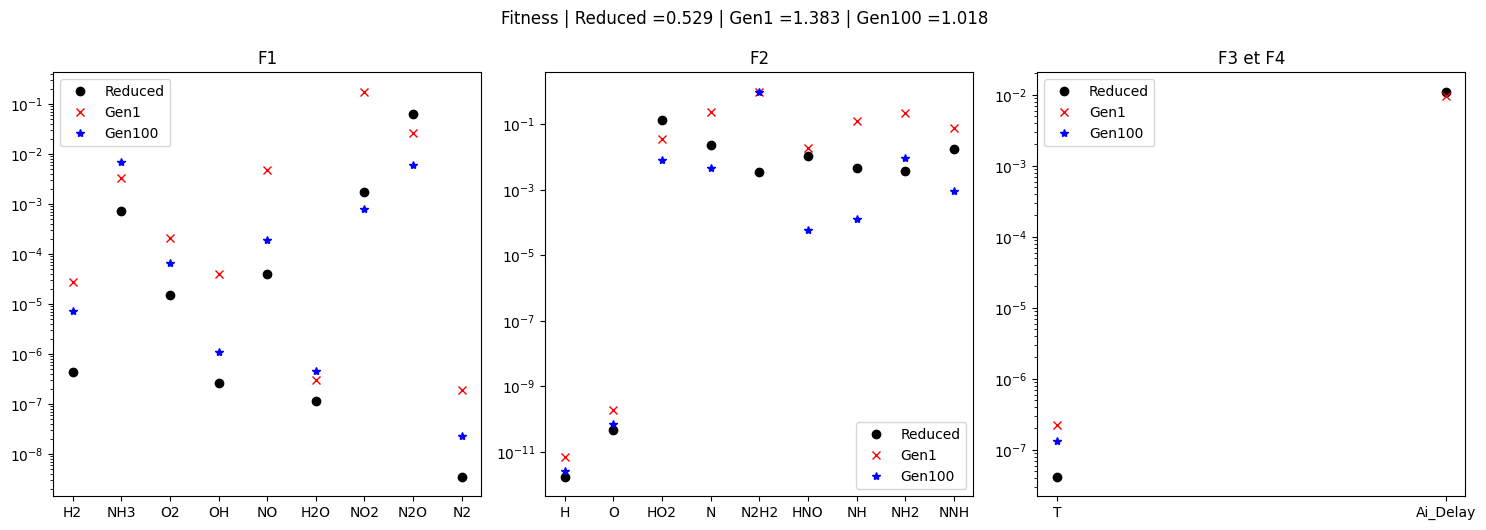

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Premier subplot pour F1
for c in range(len(case)) :
    axes[0].plot(Targets, F1[c], 'ko', label="Reduced")
    axes[0].plot(Targets, F1_1[c], 'rx', label="Gen1")
    axes[0].plot(Targets, F1_100[c], 'b*', label="Gen100")
    axes[0].legend()
    axes[0].set_yscale("log")
    axes[0].set_title("F1")

    # Deuxième subplot pour F2
    axes[1].plot(Non_Target, F2[c], 'ko', label="Reduced")
    axes[1].plot(Non_Target, F2_1[c], 'rx', label="Gen1")
    axes[1].plot(Non_Target, F2_100[c], 'b*', label="Gen100")
    axes[1].legend()
    axes[1].set_yscale("log")
    axes[1].set_title("F2")

    # Troisième subplot pour F3 et F4
    axes[2].plot(["T"], F3[c], 'ko', label="Reduced")
    axes[2].plot(["T"], F3_1[c], 'rx', label="Gen1")
    axes[2].plot(["T"], F3_100[c], 'b*', label="Gen100")
    axes[2].plot(["Ai_Delay"], F4[c], 'ko')
    axes[2].plot(["Ai_Delay"], F4_1[c], 'rx')
    axes[2].plot(["Ai_Delay"], F4_100[c], 'b*')
    axes[2].legend()
    axes[2].set_yscale("log")
    axes[2].set_title("F3 et F4")

plt.tight_layout()
fig.suptitle(f"Fitness | Reduced ={Err:0.3f} | Gen1 ={Err_1:0.3f} | Gen100 ={Err_100:0.3f}",y=1.05)
plt.show()


In [102]:
# Time_det , Temp_det, Y_Target_det,Y_Non_Target_det,AI_delay_det
# Time_red , Temp_red, Y_Target_red,Y_Non_Target_red,AI_delay_red
# Time_red_optim1 , Temp_red_optim1, Y_Target_red_optim1,Y_Non_Target_red_optim1,AI_delay_red_optim1
# Time_red_optim100 , Temp_red_optim100, Y_Target_red_optim100,Y_Non_Target_red_optim100,AI_delay_red_optim100

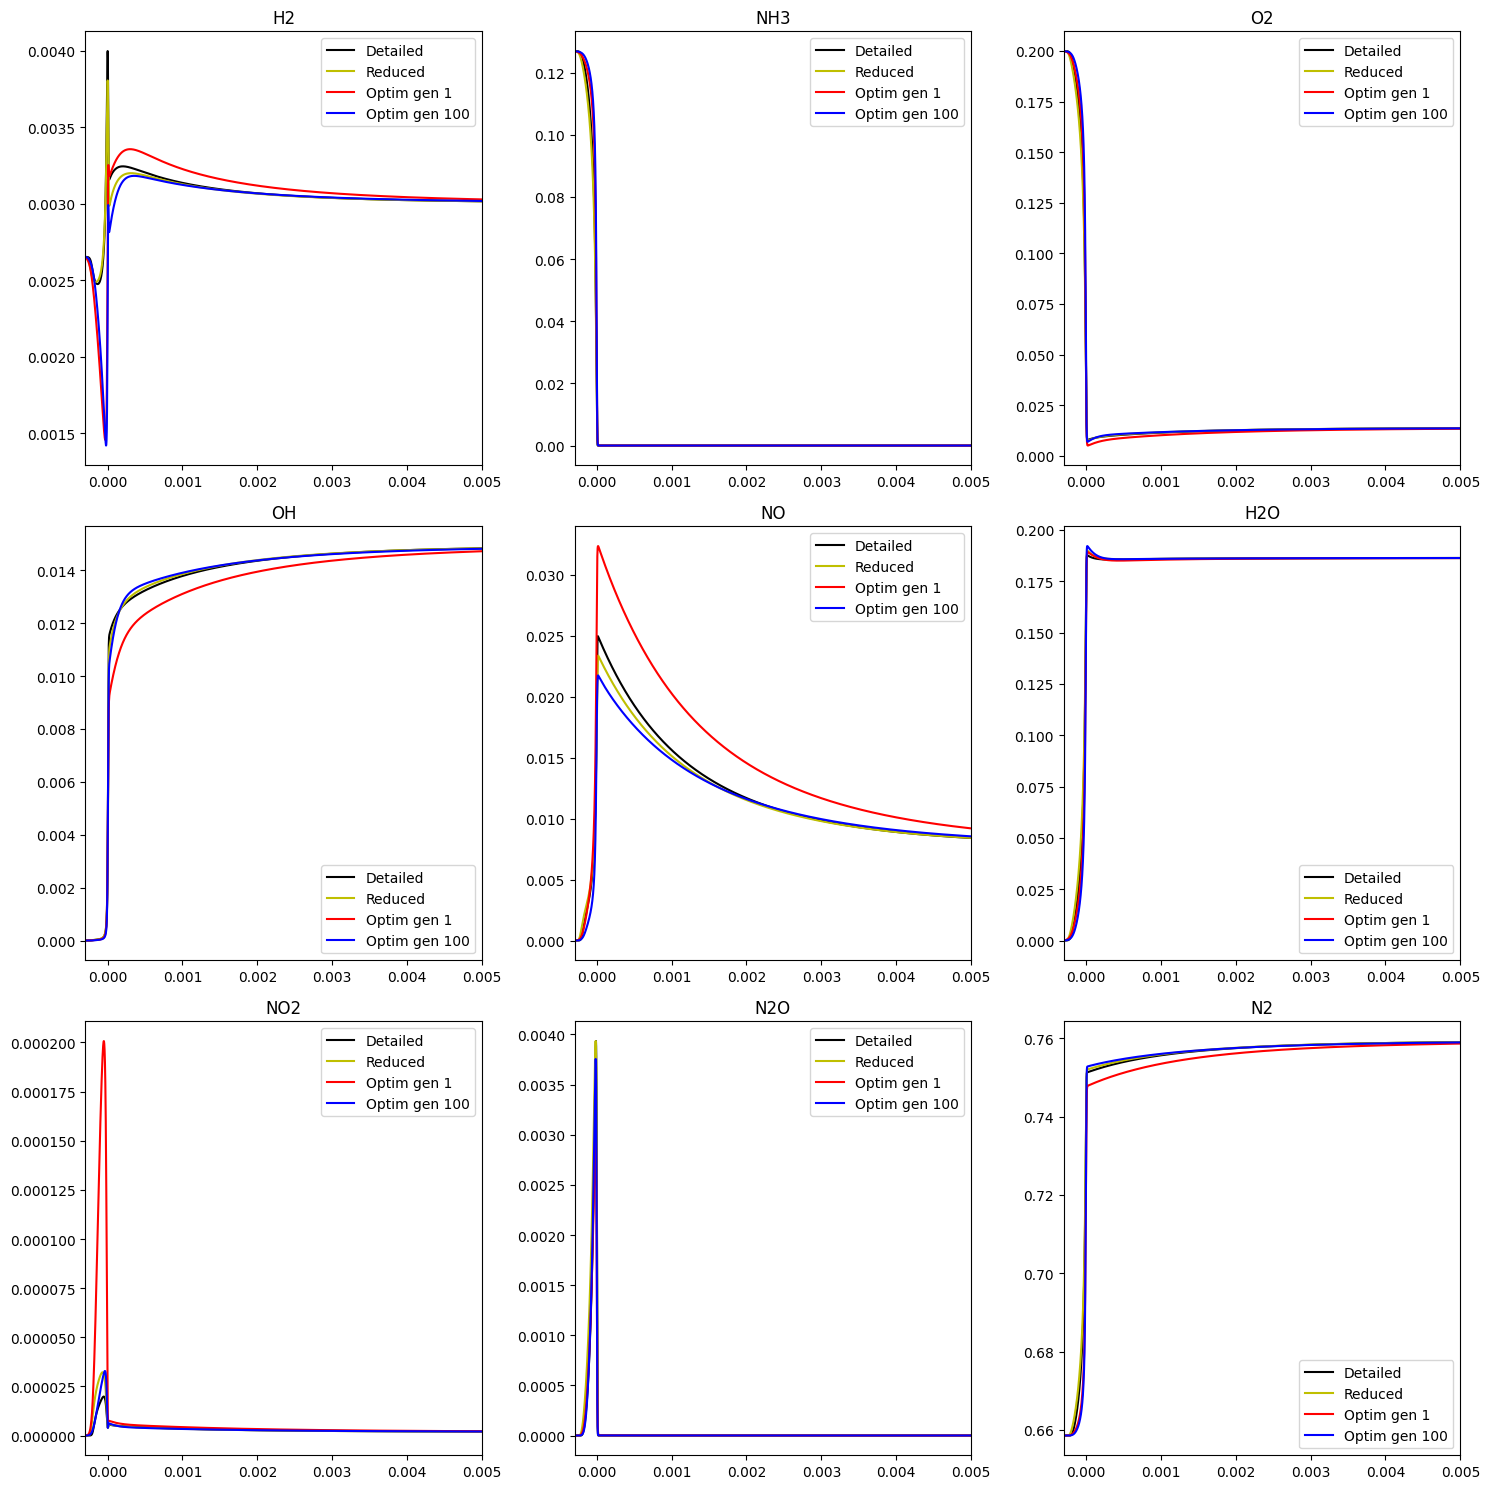

In [103]:
# Nombre de sous-graphiques (subplots)
n = len(Targets)
cols = 3  # Nombre de colonnes de subplots
rows = (n // cols) + (n % cols > 0)  # Nombre de lignes, arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Taille ajustable
axes = axes.flatten()  # Transformer la matrice d'axes en liste pour faciliter l'indexation

for i in range(n):
    ax = axes[i]
    ax.plot(Time_det[0], Y_Target_det[0][ i], 'k', label="Detailed")
    ax.plot(Time_det[0], Y_Target_red[0][i],'y', label="Reduced")
    ax.plot(Time_det[0], Y_Target_red_optim1[0][i],'r', label="Optim gen 1")
    ax.plot(Time_det[0], Y_Target_red_optim100[0][i],'b', label="Optim gen 100")
    
    ax.set_xlim([np.min(Time_det), 0.005])
    ax.set_title(f"{Targets[i]}")
    ax.legend()

# Supprimer les subplots vides si len(Targets) < rows * cols
for i in range(n, rows * cols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.savefig("F1.png")
plt.show()


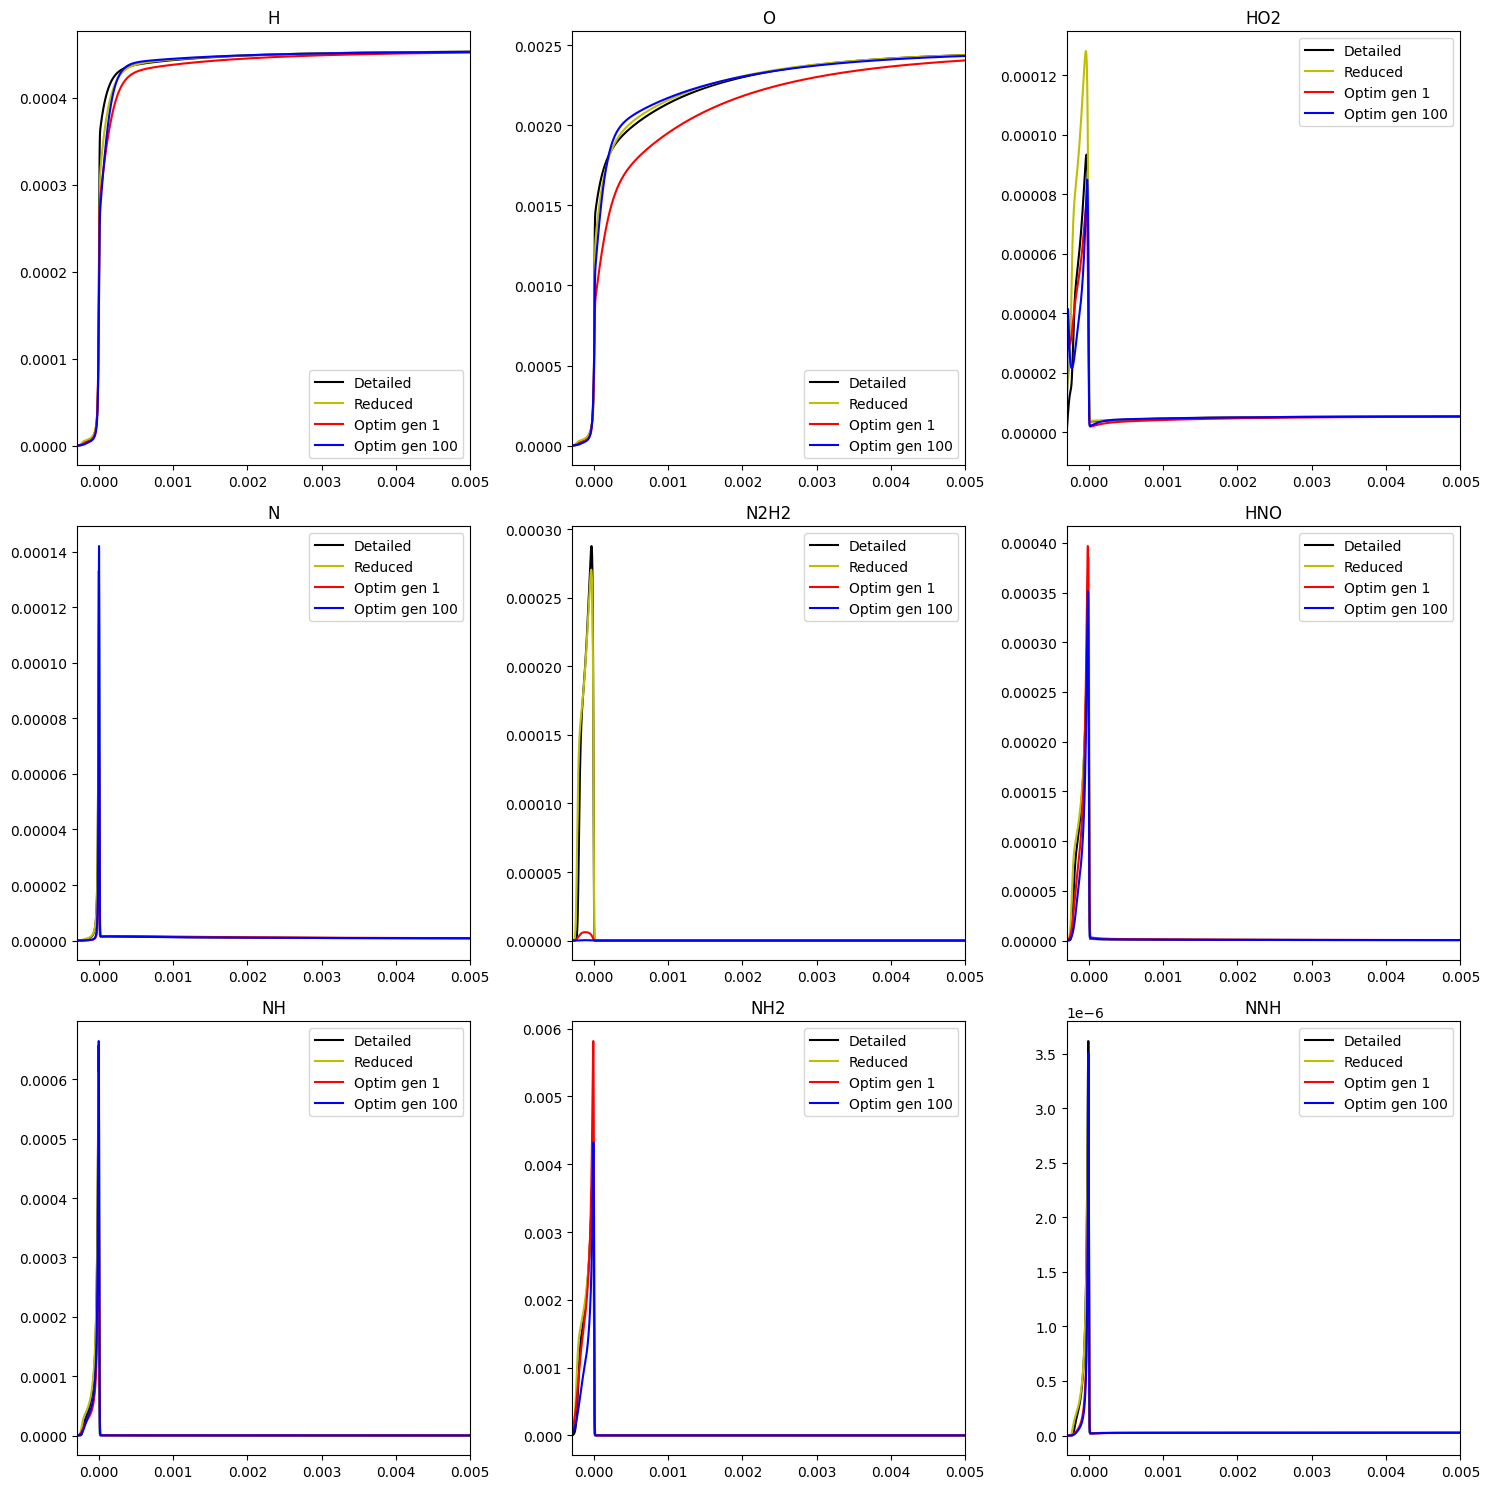

In [104]:
# Nombre de sous-graphiques (subplots)
n = len(Non_Target)
cols = 3  # Nombre de colonnes de subplots
rows = (n // cols) + (n % cols > 0)  # Nombre de lignes, arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Taille ajustable
axes = axes.flatten()  # Transformer la matrice d'axes en liste pour faciliter l'indexation

for i in range(n):
    ax = axes[i]
    ax.plot(Time_det[0], Y_Non_Target_det[0][i], 'k', label="Detailed")
    ax.plot(Time_det[0], Y_Non_Target_red[0][i],'y', label="Reduced")
    ax.plot(Time_det[0], Y_Non_Target_red_optim1[0][i],'r', label="Optim gen 1")
    ax.plot(Time_det[0], Y_Non_Target_red_optim100[0][i],'b', label="Optim gen 100")
    ax.set_xlim([np.min(Time_det[0]), 0.005])
    ax.set_title(f"{Non_Target[i]}")
    ax.legend()

# Supprimer les subplots vides si len(Targets) < rows * cols
for i in range(n, rows * cols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.savefig("F2.png")
plt.show()


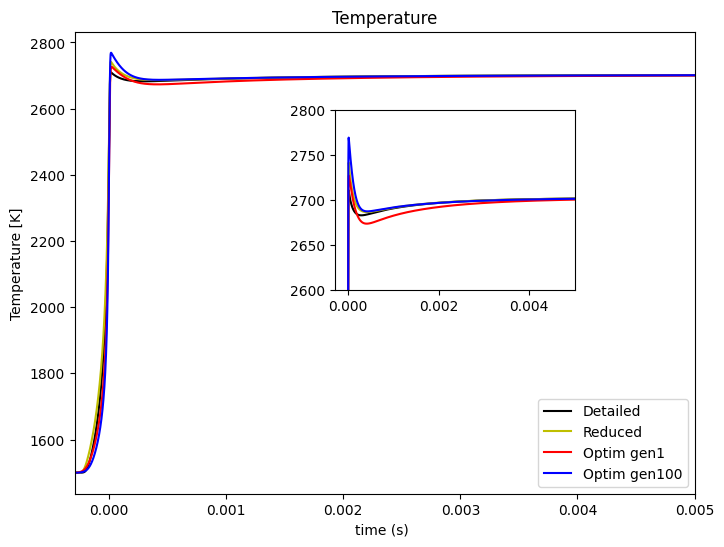

In [105]:
# Création de la figure principale
fig, ax = plt.subplots(figsize=(8, 6))

# Tracé des courbes principales
ax.plot(Time_det[0], Temp_det[0], 'k', label="Detailed")
ax.plot(Time_det[0], Temp_red[0], "y-", label="Reduced")
ax.plot(Time_det[0], Temp_red_optim1[0], 'r-', label="Optim gen1")
ax.plot(Time_det[0], Temp_red_optim100[0], 'b-', label='Optim gen100')
ax.set_xlabel("time (s) ")
ax.set_ylabel("Temperature [K]")

# Limites de la figure principale
ax.set_xlim([np.min(Time_det[0]), 0.005])
ax.legend()
ax.set_title("Temperature")

# Création de l'axe pour le zoom (inset)
ax_zoom = fig.add_axes([0.45, 0.45, 0.3, 0.3])  # Position et taille du zoom

# Tracé des courbes dans la zone de zoom
ax_zoom.plot(Time_det[0], Temp_det[0], 'k', label="Detailed")
ax_zoom.plot(Time_det[0], Temp_red[0], "y-", label="Reduced")
ax_zoom.plot(Time_det[0], Temp_red_optim1[0], 'r-', label="Optim gen1")
ax_zoom.plot(Time_det[0], Temp_red_optim100[0], 'b-', label='Optim gen2')

# Limites du zoom
ax_zoom.set_xlim([np.min(Time_det[0]), 0.005])
ax_zoom.set_ylim([2600, 2800])

# Ajout d'un cadre autour du zoom
ax_zoom.spines['top'].set_color('k')
ax_zoom.spines['bottom'].set_color('k')
ax_zoom.spines['left'].set_color('k')
ax_zoom.spines['right'].set_color('k')

# Affichage de la figure
plt.savefig("F3.png")
plt.show()


In [11]:
import pandas as pd 
import numpy as np

In [12]:
data =pd.read_pickle("/work/kotlarcm/WORK/V2/Orion/Time_red_optim1.pkl")


In [13]:
print(len(data))

88
